## import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load dataset

In [3]:
raw = pd.read_csv('car_prices.csv', on_bad_lines='skip')
raw.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## 1. Descriptive Statistics

Homework:<br>
A. Semua kolom tipenya sudah sesuai <br>
B. Kolom dengan null value: `make`,`model`,`trim`,`body`,`transmission`,`condition`,`odometer`,`color`, dan `interior` <br>
C. 
- `odometer`, `mmr`, dan `sellingprice` ada kecenderungan <b>negatively skewed</b> (mean<median)
- data min perlu dicek kembali karena nilainya terlalu kecil untuk ukuran harga (<b>1\\$ dan 25\\$ terlalu murah untuk sebuah kendaraan</b>)
- data max pada odometer ada value 999999 yang merupakan angka maksimal pada odometer kendaraan (<b>kendaraan tersebut telah melakukan perjalanan melebihi batas odometer</b>)
- `transmission` didominasi oleh automatic, rekomendasi untuk di-drop
- Semua kolom memiliki kategorikal memiliki banyak unique values, rekomendasi untuk di-drop atau dilakukan feature engineering/agregasi
- `trim`,`model`,`seller` terlalu banyak unique values, rekomendasi untuk di-drop
- `color` atau `interior` ada kecenderungan berkorelasi, rekomendasi untuk pilih salah satu
- `make`,`body`,`state`,`color` terlalu banyak unique values tapi masih bisa diagregasi

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Recommendation
- Extract data from vin (https://en.wikipedia.org/wiki/Vehicle_identification_number) and saledate

from user des.<br>
- Date : The year of production of the cars.
- Make : The brand of the car.
- Model : The edition of the car of a specific brand.
- Trim : The trim levels for a car are just different versions of the model.
- Body : The body style of a vehicle refers to the shape and model of a particular car make.
- Transmission : The mechanism that moves the power from the engine to the wheels.
- VIN : Vehichel identification number.
- State : The state in which the car is auctioned.
- Condition : The condition of the cars being at the time of auction.
- Odometer : The distance the car has travelled since manufactured.
- Color : Exterior color of the car.
- Interior : Interior color of the car.
- Seller : The seller of the car, car dealers.
- mmr : Manhiem market record, the market estimated price of the cars.
- sellingprice : The price a car was sold at auctions.
- saledate : The date on which the car has been sold.

Pengamatan\:
1. Jumlah baris yang dimiliki adalah 558811 baris
2. Ada null/missing value
3. Tipe data sudah sesuai

In [4]:
raw.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


Beberapa pengamatan:
1. Kolom `year` dan `condition` nila mean dan median tidak berbeda jauh, cenderung distribusi normal
2. kolom `odometer`, `sellingprice` dan `mmr` minimal sangat kecil, perlu dicek baris yang minimal tersebut
3. kolom `odometer`, `sellingprice` dan `mmr` ada kecenderungan skewed ke kiri/negative (mean < median)

In [5]:
cat = ['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

In [6]:
num = ['year', 'condition', 'odometer', 'mmr']

In [7]:
raw[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


Beberapa pengamatan:
1. `transmission` didominasi oleh automatic, rekomendasi untuk didrop
2. Semua kolom memiliki unique data yang cukup (kardinalitas) tinggi drop atau feature engineering/agregasi
3. `trim`,`model`,`seller` drop
4. `color` atau `interior` pilih salah satu
4. `make`,`body`,`state`,`color` agregasi

## 2. Univariate Analysis

Homework:<br>
- `odometer`,`mmr` memiliki distribusi yang positively skewed, rekomendasi untuk dilakukan log transformation
- `year` memiliki distribusi yang negatively skewed, rekomendasi anti-log transformation atau dibiarkan
- `condition` merupakan distribusi multinomial, tidak perlu ditransformasikan

### box plot

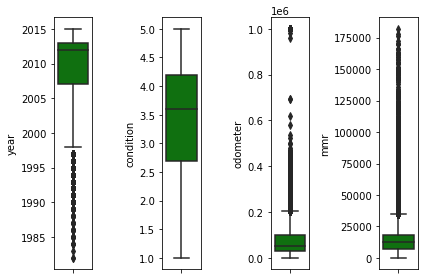

In [8]:
features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=raw[features[i]], color='green', orient='v')
    plt.tight_layout()

### distribution

C:\Users\Sony\AppData\Local\Temp/ipykernel_20312/1838533302.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(num)/2, i+1)
C:\Users\Sony\AppData\Local\Temp/ipykernel_20312/1838533302.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(num)/2, i+1)
C:\Users\Sony\AppData\Local\Temp/ipykernel_20312/1838533302.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(num)/2, i+1)
C:\Users\Sony\AppData\Local\Temp/ipykernel_20312/1838533302.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releas

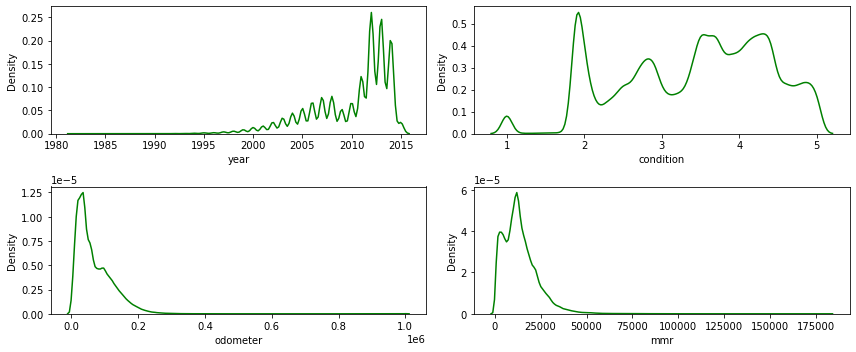

In [9]:
features = num
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(2, len(num)/2, i+1)
    sns.kdeplot(x=raw[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

- `odometer`,`mmr` positively skewed -> log trans
- `year` negatively skewed -> anti-log or something
- `condition` -> multinomian distribution

### violin plot

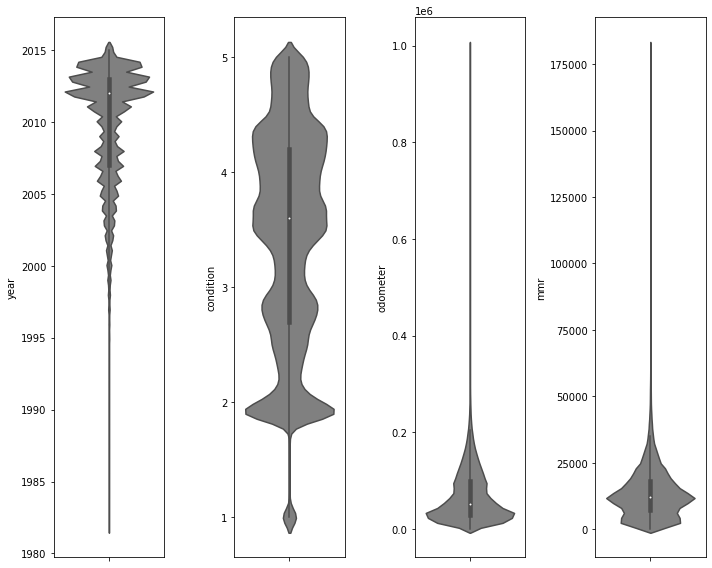

In [10]:
plt.figure(figsize=(10,8))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=raw[num[i]], color='gray', orient='v')
    plt.tight_layout()

### count plot

In [11]:
cat_lean = ['make','body','state','color']

<AxesSubplot:xlabel='transmission', ylabel='count'>

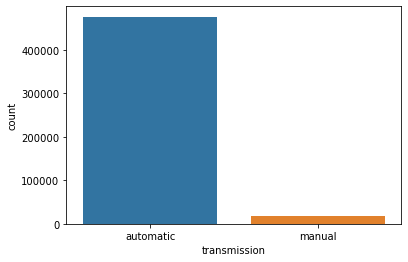

In [12]:
sns.countplot(x=raw['transmission'])

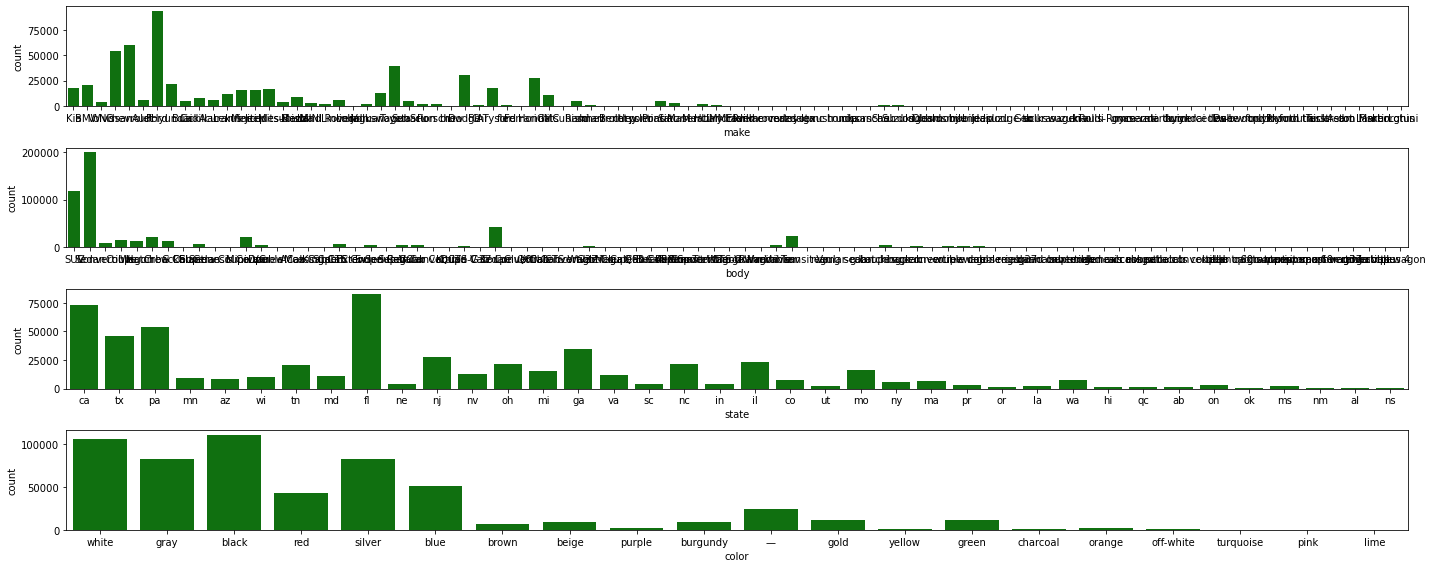

In [13]:
raw_sample = raw
plt.figure(figsize=(20,8))
for i in range(0, len(cat_lean)):
    plt.subplot(4, 1, i+1)
    sns.countplot(x = raw_sample[cat_lean[i]], color='green', orient='v')
    plt.tight_layout()

kardinalitas terlalu tinggi agregasi nilai2 yang kecil jadi "others"

## 3. Multivariate Analysis

Homework: <br>
- target untuk machine learning `mmr`

A. Features yang paling relevan dan harus dipertahankan adalah `year`,`condition`, dan `odometer` <br>
B. 
- `sellingprice` dan `mmr` memiliki korelasi yang sangat tinggi karena kita akan menggunakan `mmr` sebagai target maka `sellingprice` perlu di-drop
- `odometer` dan `year` cenderung redundan, rekomendasi untuk drop `odometer` karena `year` memiliki korelasi yang lebih tinggi terhadap target (`mmr`)

### correlation

In [14]:
raw.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


<AxesSubplot:>

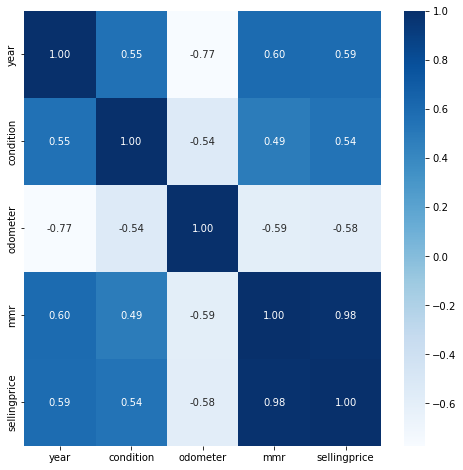

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(raw.corr(), cmap='Blues', annot=True, fmt='.2f')

- target =`mmr`
- `sellingprice` drop
- strong feature = `year`,`condition`,`odometer`
- `odometer` dan `year` cenderung redundan, pilih salah satu (year)

In [16]:
raw_lean = raw.copy()
raw_lean = raw_lean.drop(['sellingprice','condition','trim','model','seller','transmission','saledate'],axis=1)
raw_lean

,year,make,body,vin,state,odometer,color,interior,mmr
0,2015,Kia,SUV,5xyktca69fg566472,ca,16639.0,white,black,20500
1,2015,Kia,SUV,5xyktca69fg561319,ca,9393.0,white,beige,20800
2,2014,BMW,Sedan,wba3c1c51ek116351,ca,1331.0,gray,black,31900
3,2015,Volvo,Sedan,yv1612tb4f1310987,ca,14282.0,white,black,27500
4,2014,BMW,Sedan,wba6b2c57ed129731,ca,2641.0,gray,black,66000
...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,Sedan,knalw4d4xf6019304,in,18255.0,silver,black,35300
558807,2012,Ram,Crew Cab,3c6td5et6cg112407,wa,54393.0,white,black,30200
558808,2012,BMW,SUV,5uxzw0c58cl668465,ca,50561.0,black,black,29800
558809,2015,Nissan,sedan,1n4al3ap0fc216050,ga,16658.0,white,black,15100


<Figure size 1080x1080 with 0 Axes>

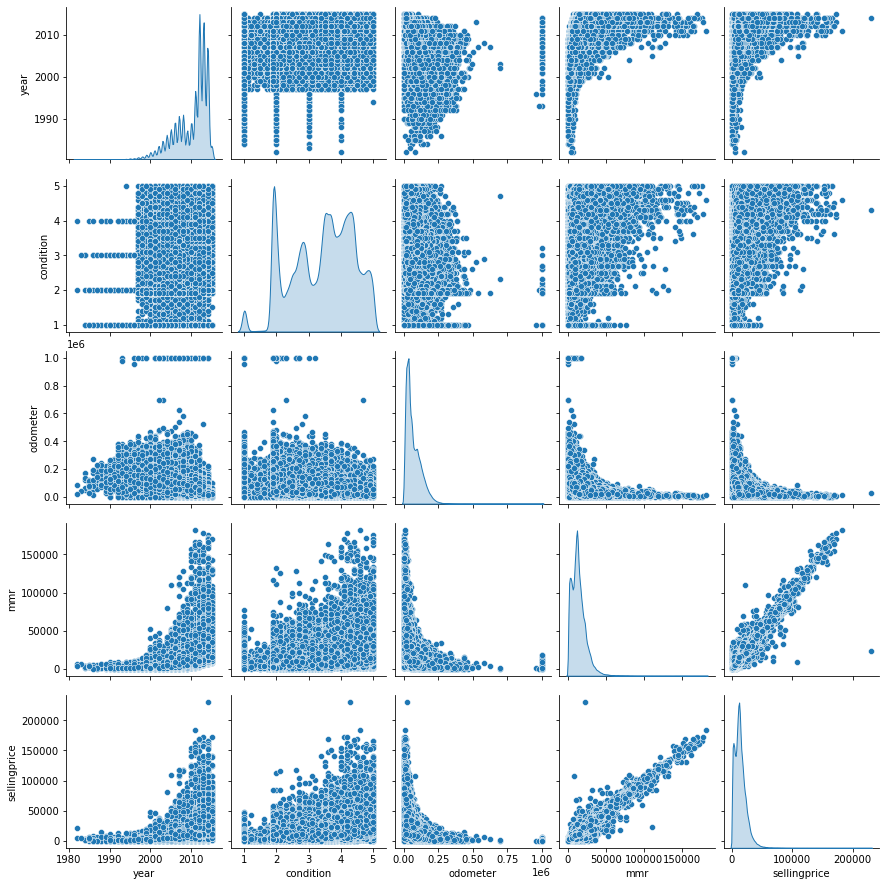

In [17]:
plt.figure(figsize=(15, 15))
sns.pairplot(raw, diag_kind='kde')

D:\7.APPS\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Sony\AppData\Local\Temp/ipykernel_20312/3502221967.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
D:\7.APPS\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Sony\AppData\Local\Temp/ipykernel_20312/3502221967.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
C:\Users\Sony\AppData\Local\Temp/ipykernel_20312/3502221967.py:7: UserWarning: Tight layout not applied. The bottom and top marg

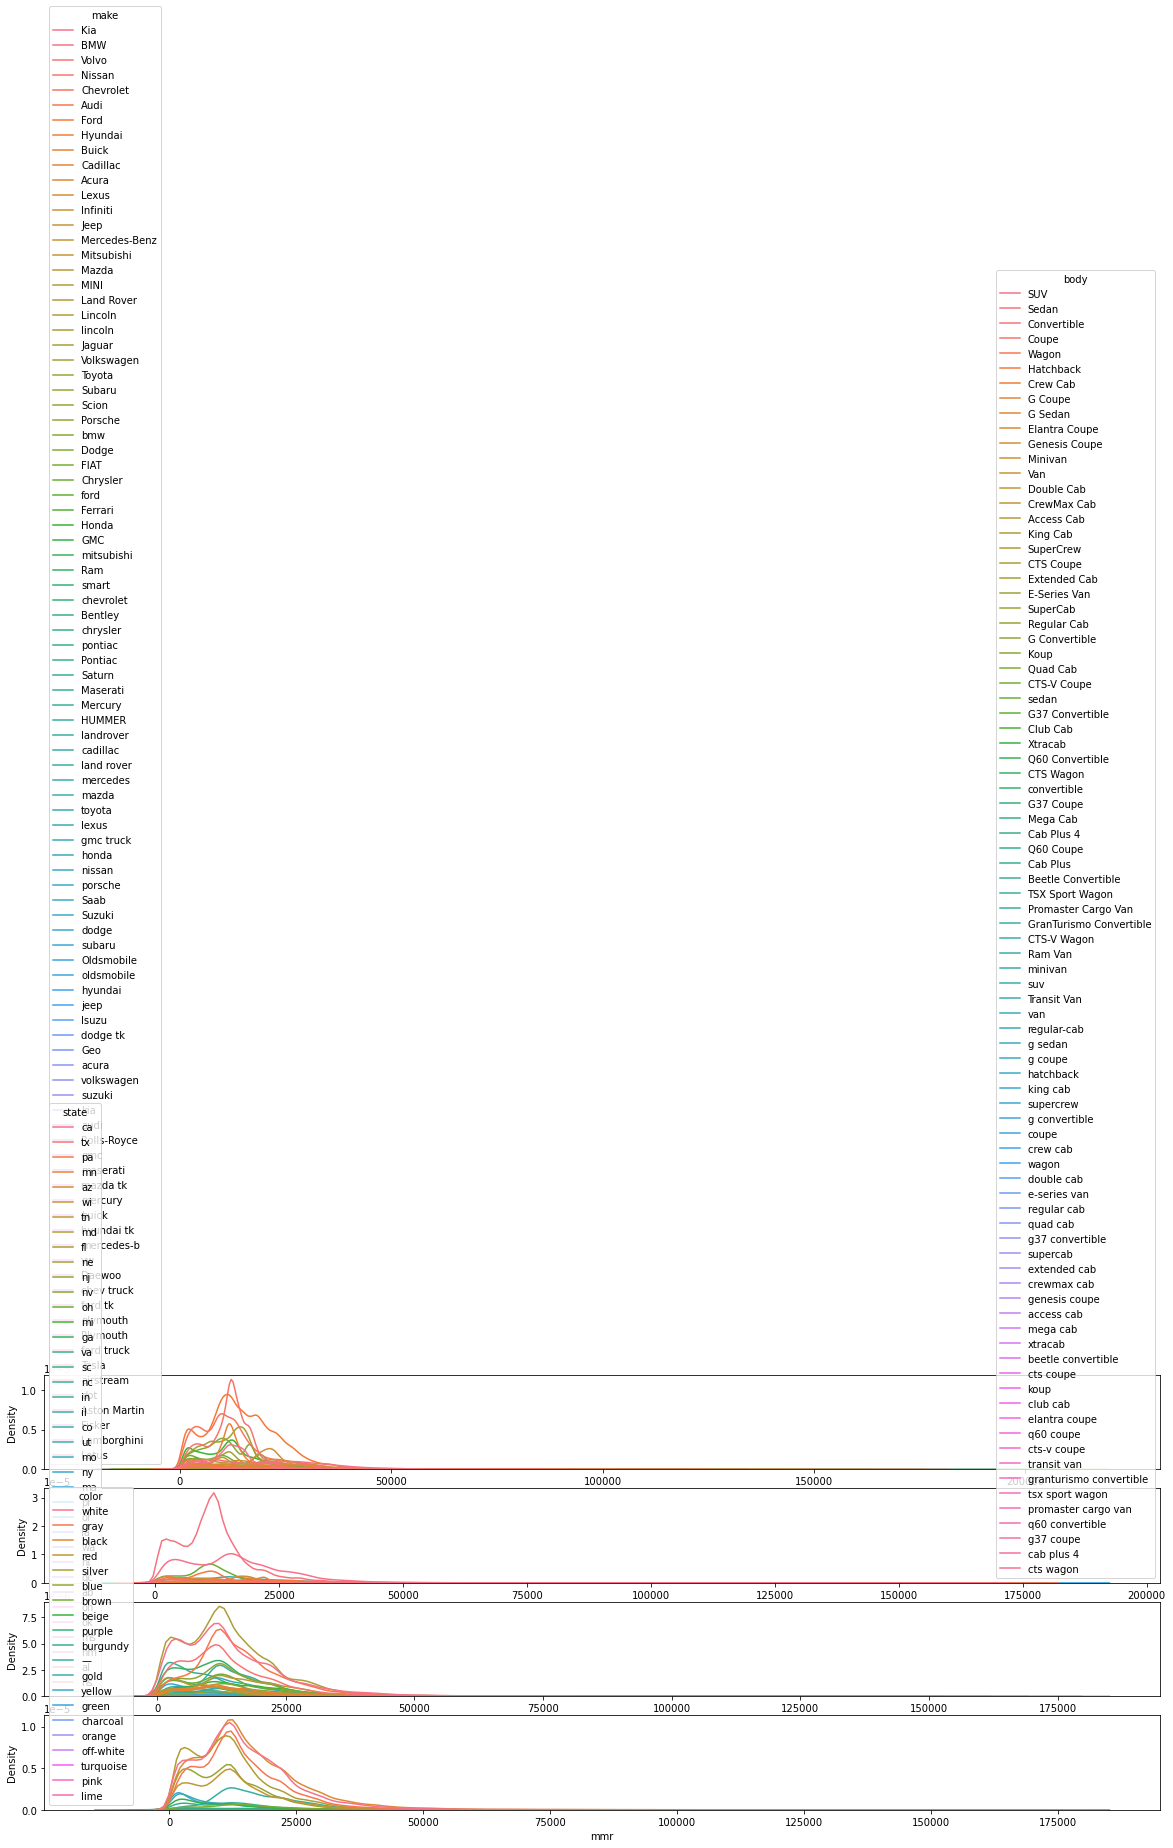

In [18]:
features = cat_lean
plt.figure(figsize=(20,8))
for i in range(0, len(features)):
    plt.subplot(4, 1, i+1) 
    sns.kdeplot(data=raw, x='mmr', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

<Figure size 1440x576 with 0 Axes>

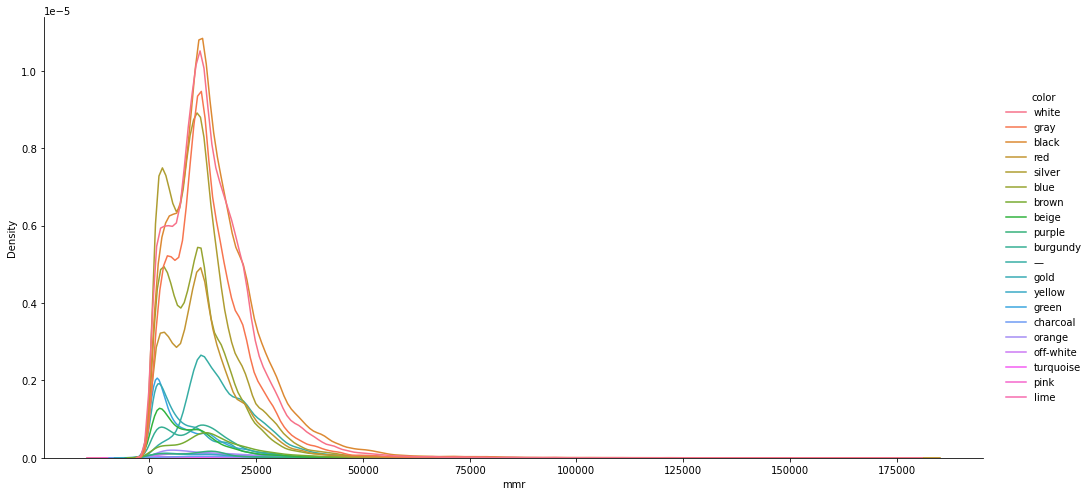

In [19]:
plt.figure(figsize=(20,8))
sns.displot(data=raw,
            x='mmr',
            kind='kde',
            hue='color',
            height=7,
            aspect=2)

<Figure size 1440x576 with 0 Axes>

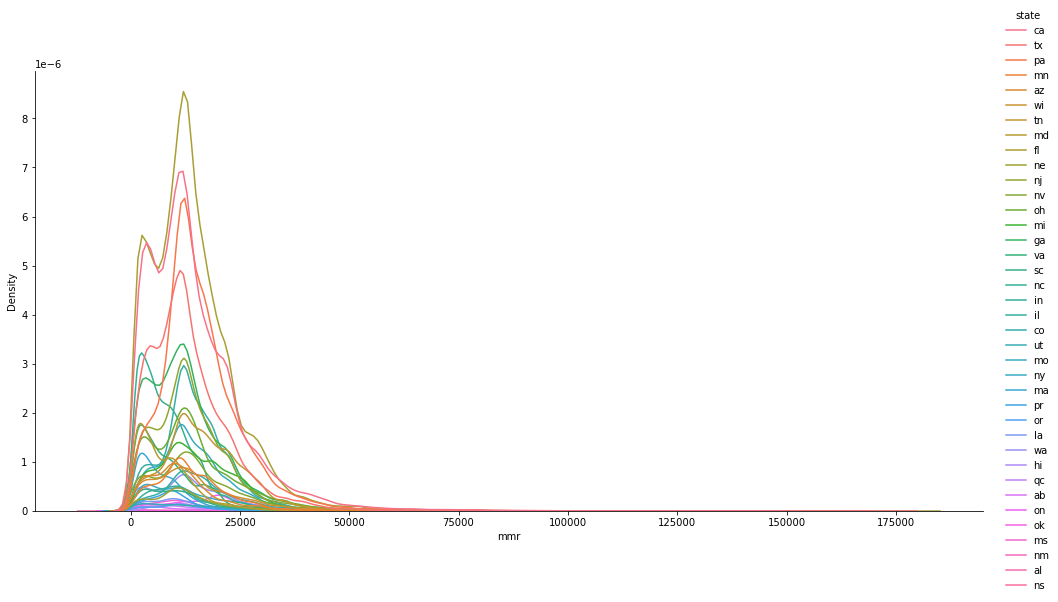

In [20]:
plt.figure(figsize=(20,8))
sns.displot(data=raw,
            x='mmr',
            kind='kde',
            hue='state',
            height=7,
            aspect=2)

D:\7.APPS\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

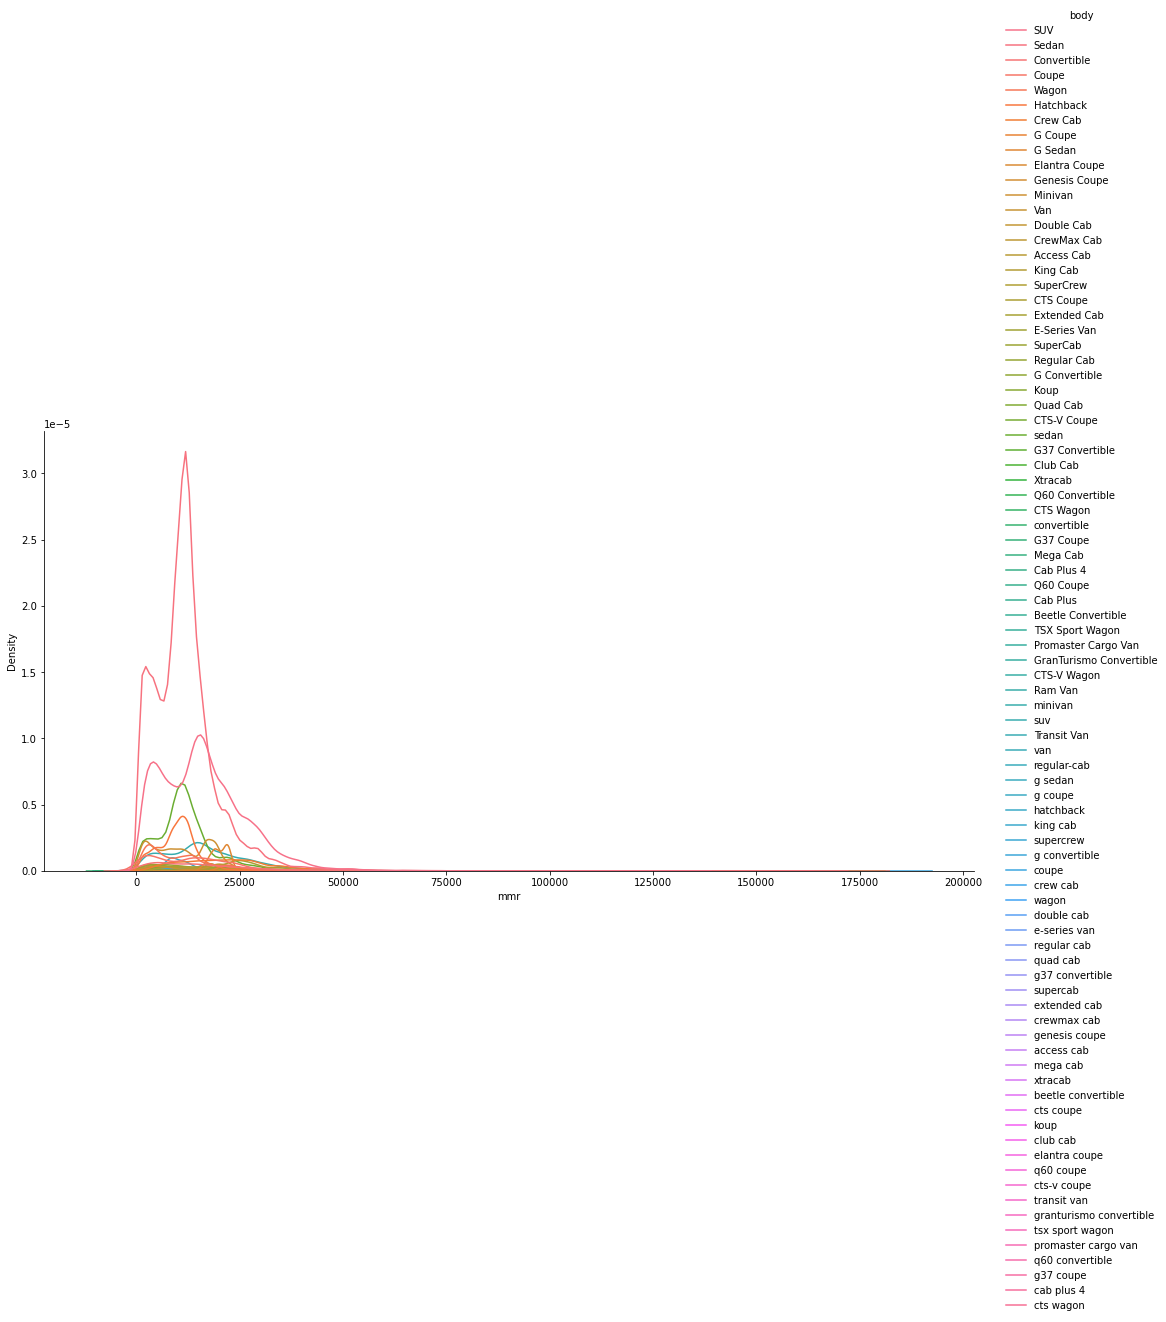

In [21]:
plt.figure(figsize=(20,8))
sns.displot(data=raw,
            x='mmr',
            kind='kde',
            hue='body',
            height=7,
            aspect=2)

D:\7.APPS\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

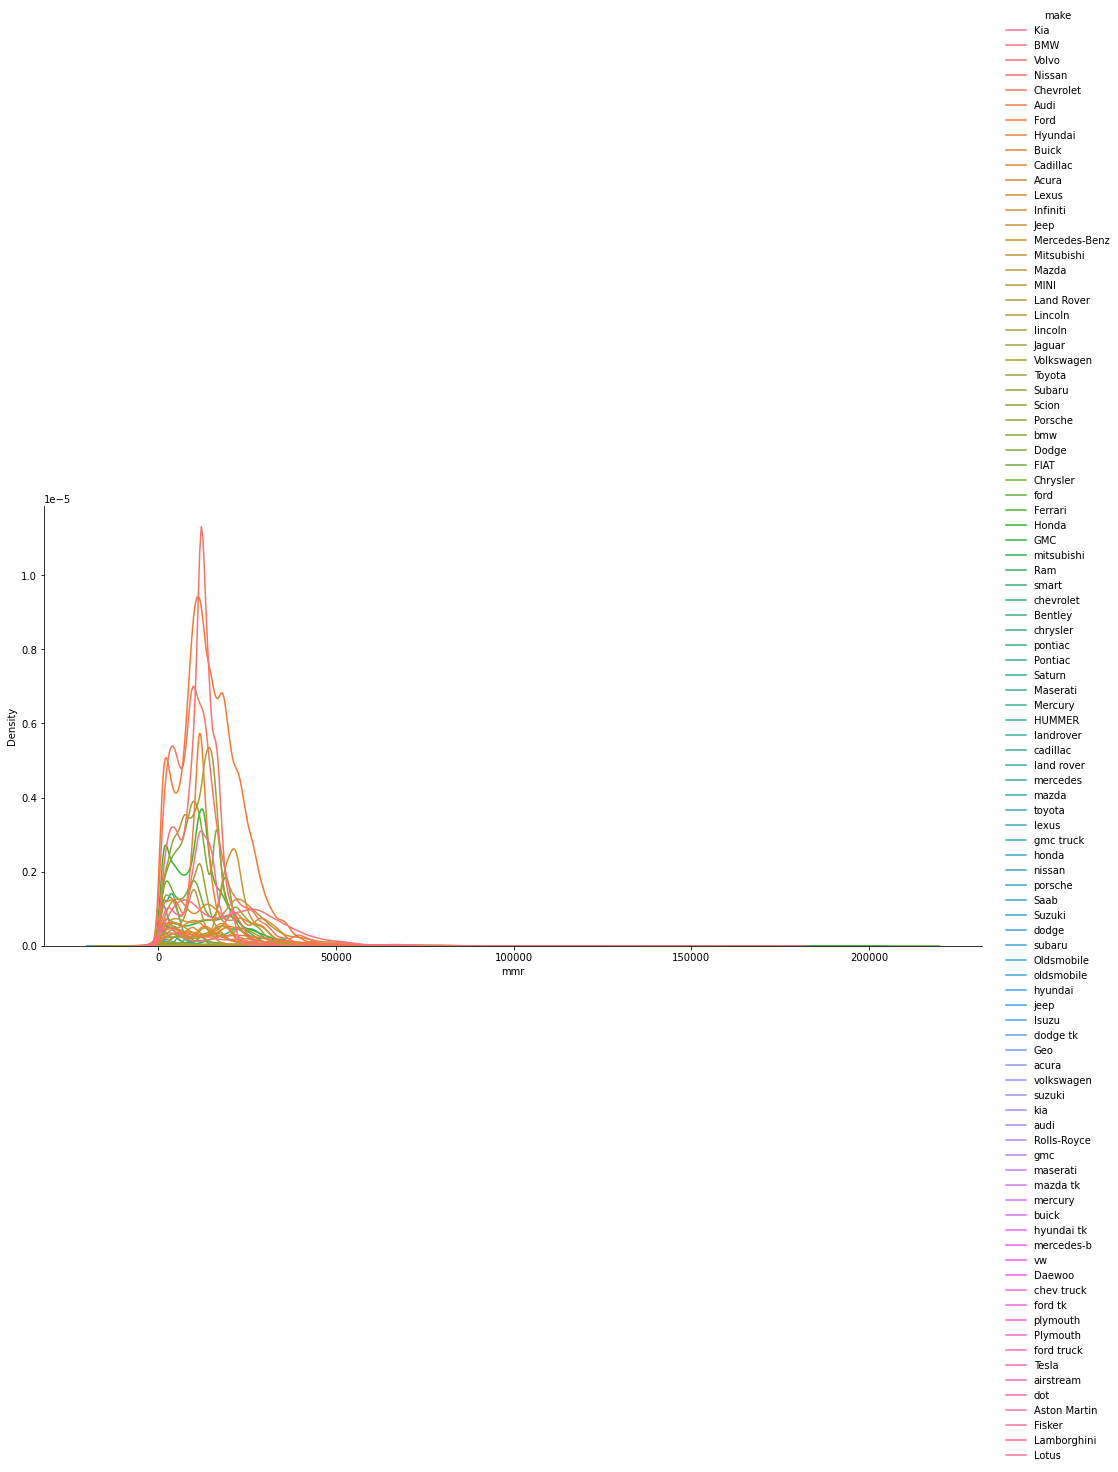

In [22]:
plt.figure(figsize=(20,8))
sns.displot(data=raw,
            x='mmr',
            kind='kde',
            hue='make',
            height=7,
            aspect=2)

In [23]:
raw.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [24]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [25]:
raw.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


## Data Preprocessing

### Data Cleansing

In [26]:
df = raw.copy()
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [27]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


#### Drop Columns

In [28]:
raw.groupby('body').count() #cek price tiap body, model, trim

,year,make,model,trim,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
body,,,,,,,,,,,,,,,
Access Cab,232,232,232,232,214,232,232,227,232,231,231,232,232,232,232
Beetle Convertible,52,52,52,52,47,52,52,52,52,51,51,52,52,52,52
CTS Coupe,129,129,129,129,102,129,129,129,129,129,129,129,129,129,129
CTS Wagon,13,13,13,13,11,13,13,12,13,13,13,13,13,13,13
CTS-V Coupe,28,28,28,28,21,28,28,27,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transit van,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
tsx sport wagon,8,8,8,8,6,8,8,8,8,8,8,8,8,8,8
van,570,570,570,570,444,570,570,570,570,570,570,570,570,570,570


In [29]:
drop = ['model','trim','vin','mmr','seller'] #model dan trim cek lagi
df_drop = df.drop(drop, axis=1)
df_drop

,year,make,body,transmission,state,condition,odometer,color,interior,sellingprice,saledate
0,2015,Kia,SUV,automatic,ca,5.0,16639.0,white,black,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,SUV,automatic,ca,5.0,9393.0,white,beige,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,Sedan,automatic,ca,4.5,1331.0,gray,black,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,Sedan,automatic,ca,4.1,14282.0,white,black,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,Sedan,automatic,ca,4.3,2641.0,gray,black,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,Sedan,NaN,in,4.5,18255.0,silver,black,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,Crew Cab,automatic,wa,5.0,54393.0,white,black,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,SUV,automatic,ca,4.8,50561.0,black,black,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,sedan,automatic,ga,3.8,16658.0,white,black,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


#### Missing Data

In [30]:
df_nan = df_drop.copy()
df_nan.isna().sum()

year                0
make            10301
body            13195
transmission    65353
state               0
condition       11794
odometer           94
color             749
interior          749
sellingprice        0
saledate            0
dtype: int64

In [31]:
drop_miss = []
for i in df_nan:
    nan_perc = round(100*df_nan[i].isna().sum()/df_nan.shape[0],2)
    if nan_perc < 10:
        drop_miss.append(i)
    print('missing value {} : {}'.format(i,nan_perc))
print(drop_miss) #coba dicek satu baris yang kosong apa aja
#groupby yang categorical buat liat hubungan yang categorical sama target (stage_1)

missing value year : 0.0
missing value make : 1.84
missing value body : 2.36
missing value transmission : 11.7
missing value state : 0.0
missing value condition : 2.11
missing value odometer : 0.02
missing value color : 0.13
missing value interior : 0.13
missing value sellingprice : 0.0
missing value saledate : 0.0
['year', 'make', 'body', 'state', 'condition', 'odometer', 'color', 'interior', 'sellingprice', 'saledate']


In [32]:
df_nan = df_nan.dropna(subset=drop_miss)
df_nan.isna().sum()

year                0
make                0
body                0
transmission    61329
state               0
condition           0
odometer            0
color               0
interior            0
sellingprice        0
saledate            0
dtype: int64

In [33]:
df_nan['transmission'].fillna(df_nan['transmission'].mode()[0],inplace=True) #alternatif isi na lihat dari fitur lain
df_nan.isna().sum()

year            0
make            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
saledate        0
dtype: int64

#### Duplicated Data

In [34]:
df_duplicated = df_nan.copy()
df_duplicated.duplicated().sum() #no row is a duplicate, yay!

0

#### Outliers

In [35]:
from scipy import stats 

df_outliers = df_duplicated.copy()
nums = ['year','condition','odometer','sellingprice']

print(f'Jumlah baris sebelum memfilter outlier: {len(df_outliers)}')

filtered_entries = np.array([True] * len(df_outliers))

for col in nums:
    zscore = abs(stats.zscore(df_outliers[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_outliers = df_outliers[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_outliers)}') #cek yang dihapus data seperti apa, hubungan antar fitur, masuk akal gak

Jumlah baris sebelum memfilter outlier: 533753
Jumlah baris setelah memfilter outlier: 517759


In [36]:
outliers = df_duplicated.shape[0]-df_outliers.shape[0]
outliers

15994

In [37]:
outliers/df_duplicated.shape[0]*100

2.9965171155946666

### Feature Engineering

#### Log Transformation

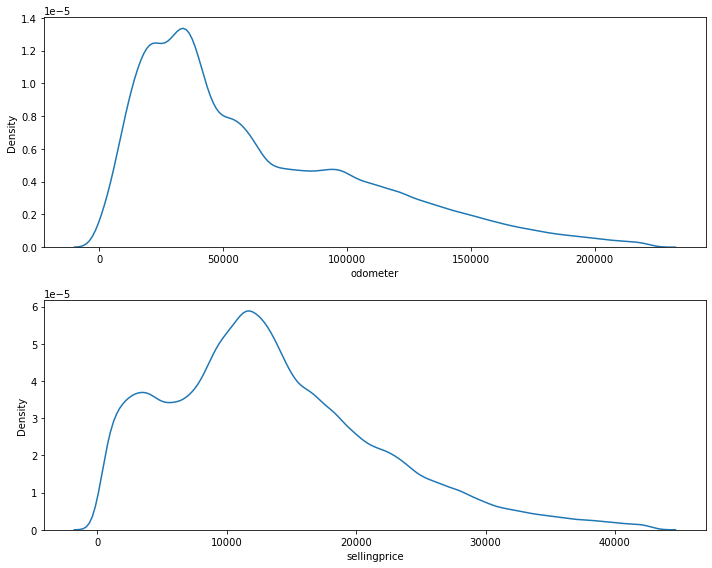

In [38]:
df_log = df_outliers.copy()

fig, axes = plt.subplots(2, figsize=(10,8))
sns.kdeplot(x=df_log['odometer'], ax=axes[0])
sns.kdeplot(x=df_log['sellingprice'], ax=axes[1])
plt.tight_layout()

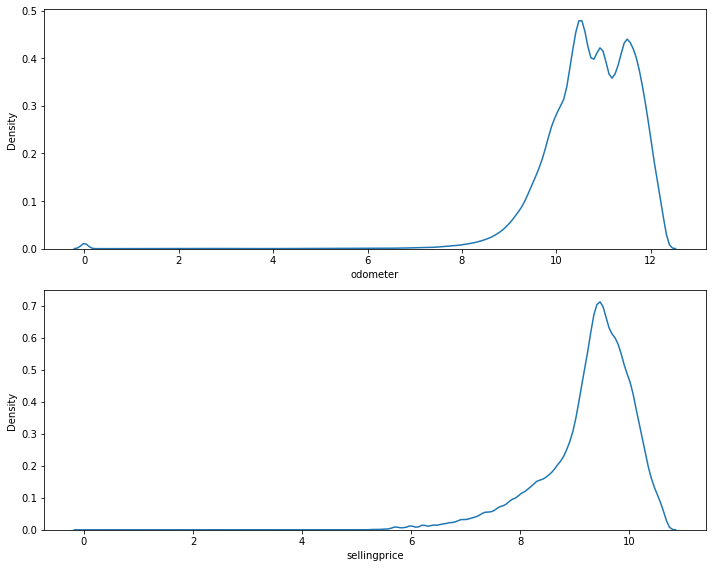

In [39]:
fig, axes = plt.subplots(2, figsize=(10,8))
sns.kdeplot(x=np.log(df_log['odometer']), ax=axes[0])
sns.kdeplot(x=np.log(df_log['sellingprice']), ax=axes[1])
plt.tight_layout()

#### Normalization/Standardization

#### Feature Encoding Preparation

In [40]:
df_encode = df_log.copy()
df_encode['make'] = df_encode['make'].str.lower()
df_encode['body'] = df_encode['body'].str.lower()
df_encode['state'] = df_encode['state'].str.lower()
df_encode.describe(include='object')

,make,body,transmission,state,color,interior,saledate
count,517759,517759,517759,517759,517759,517759,517759
unique,48,43,2,38,20,17,3647
top,ford,sedan,automatic,fl,black,black,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,90017,230272,502303,77089,102983,233556,5124


In [41]:
# make = df_encode.groupby('make').agg({'sellingprice':'count'}).reset_index().sort_values('make')
# make.columns = ['make','car_sold']
# make

In [42]:
# df_encode.loc[df_encode['make'].str.contains('chev',na=False), 'make'] = 'chevrolet'
# df_encode.loc[df_encode['make'].str.contains('dodge',na=False), 'make'] = 'dodge'
# df_encode.loc[df_encode['make'].str.contains('mazda',na=False), 'make'] = 'mazda'
# df_encode.loc[df_encode['make'].str.contains('hyundai',na=False), 'make'] = 'hyundai'
# df_encode.loc[df_encode['make'].str.contains('ford',na=False), 'make'] = 'ford'
# df_encode.loc[df_encode['make'].str.contains('mercedes',na=False), 'make'] = 'mercedes-benz'
# df_encode.loc[df_encode['make'].str.contains('vw',na=False), 'make'] = 'volkswagen'
# df_encode.loc[df_encode['make'].str.contains('gmc',na=False), 'make'] = 'gmc'
# df_encode.loc[df_encode['make'].str.contains('landrover',na=False), 'make'] = 'land rover'

In [43]:
# make_count = df.groupby('make').agg({'sellingprice':'count'}).reset_index().sort_values('sellingprice')
# make_count.columns = ['make','sellingprice']
# top_make = make_count[make_count['sellingprice']>10000]['make'].to_list()
# top_make

In [44]:
# df['make'] = np.where(df['make'].isin(top_make),df['make'],'others')

In [45]:
# plt.figure(figsize=(15,10))
# sns.countplot(df['make'].sort_values(ascending=False))

In [46]:
df_encode.loc[df_encode['body'].str.contains('convertible',na=False), 'body'] = 'convertible'
df_encode.loc[df_encode['body'].str.contains('cab',na=False), 'body'] = 'cab'
df_encode.loc[df_encode['body'].str.contains(' van',na=False), 'body'] = 'van'
df_encode.loc[df_encode['body'].str.contains('wagon',na=False), 'body'] = 'wagon'
df_encode.loc[df_encode['body'].str.contains('coupe',na=False), 'body'] = 'coupe'
df_encode.loc[df_encode['body'].str.contains('koup',na=False), 'body'] = 'coupe'
df_encode.loc[df_encode['body'].str.contains('sedan',na=False), 'body'] = 'sedan'
df_encode['body'].unique().shape[0] #unique value untuk body
#cek hubungan dengan target (mean, median, percentile)

10

In [47]:
df_encode['state'].unique()

array(['ca', 'tx', 'mn', 'az', 'wi', 'tn', 'fl', 'nj', 'ga', 'va', 'sc',
       'in', 'il', 'mi', 'oh', 'co', 'ut', 'mo', 'pa', 'ne', 'nv', 'ma',
       'pr', 'nc', 'ny', 'or', 'md', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'nm', 'ms', 'al', 'ns'], dtype=object)

In [48]:
west = ['wa','or','ca','mt','id','nv','wy','ut','az','co','nm','hi','ak']
south = ['ok','tx','ar','la','ms','al','tn','ky','wv','dc','md','md','va','nc','sc','ga','fl']
northeast = ['me','nh','vt','ma','ct','ri','nj','ny','pa']
midwest = ['nd','sd','ne','ks','mn','ia','mo','wi','il','in','mi','oh']
us = [west,south,northeast,midwest]
us_states = 0
for i in us:
    us_states = us_states + len(i)
us_states #cek deskriptif statistik terhadap target

51

In [49]:
df_encode.loc[df_encode['state'].isin(west), 'state'] = 'west'
df_encode.loc[df_encode['state'].isin(south), 'state'] = 'south'
df_encode.loc[df_encode['state'].isin(northeast), 'state'] = 'northeast'
df_encode.loc[df_encode['state'].isin(midwest), 'state'] = 'midwest'
df_encode.loc[~df_encode['state'].isin(['west','south','northeast','midwest']),'state'] = 'outside_us'
df_encode['state'].unique()

array(['west', 'south', 'midwest', 'northeast', 'outside_us'],
      dtype=object)

In [50]:
df_encode['state'].value_counts()

south         220071
west          104317
midwest        97877
northeast      88376
outside_us      7118
Name: state, dtype: int64

In [51]:
df_encode['state'].unique().shape[0]

5

In [52]:
df_encode['day'] = df_encode['saledate'].str.split(' ').str[0]
df_encode['month'] = df_encode['saledate'].str.split(' ').str[1]
df_encode['date'] = df_encode['saledate'].str.split(' ').str[2].astype(int)
df_encode.drop('saledate',axis=1,inplace=True)
df_encode.head() #bisa didrop

,year,make,body,transmission,state,condition,odometer,color,interior,sellingprice,day,month,date
0,2015,kia,suv,automatic,west,5.0,16639.0,white,black,21500,Tue,Dec,16
1,2015,kia,suv,automatic,west,5.0,9393.0,white,beige,21500,Tue,Dec,16
2,2014,bmw,sedan,automatic,west,4.5,1331.0,gray,black,30000,Thu,Jan,15
3,2015,volvo,sedan,automatic,west,4.1,14282.0,white,black,27750,Thu,Jan,29
5,2015,nissan,sedan,automatic,west,1.0,5554.0,gray,black,10900,Tue,Dec,30


In [53]:
df_encode['day'].unique()

array(['Tue', 'Thu', 'Wed', 'Fri', 'Mon', 'Sat', 'Sun'], dtype=object)

In [54]:
df_encode['month'].unique()

array(['Dec', 'Jan', 'Jul', 'Feb', 'Jun', 'May', 'Mar', 'Apr'],
      dtype=object)

In [55]:
df_encode['date'].unique().shape[0]

31

In [56]:
df_encode.head()

,year,make,body,transmission,state,condition,odometer,color,interior,sellingprice,day,month,date
0,2015,kia,suv,automatic,west,5.0,16639.0,white,black,21500,Tue,Dec,16
1,2015,kia,suv,automatic,west,5.0,9393.0,white,beige,21500,Tue,Dec,16
2,2014,bmw,sedan,automatic,west,4.5,1331.0,gray,black,30000,Thu,Jan,15
3,2015,volvo,sedan,automatic,west,4.1,14282.0,white,black,27750,Thu,Jan,29
5,2015,nissan,sedan,automatic,west,1.0,5554.0,gray,black,10900,Tue,Dec,30


In [57]:
df_encode.describe(include='object')

,make,body,transmission,state,color,interior,day,month
count,517759,517759,517759,517759,517759,517759,517759,517759
unique,48,10,2,5,20,17,7,8
top,ford,sedan,automatic,south,black,black,Wed,Feb
freq,90017,237683,502303,220071,102983,233556,155935,154305


#### Feature Encoding

In [58]:
df_onehot = df_encode.copy()
for cat in ['make', 'body','transmission','state','color','interior','day','month']:
    onehots = pd.get_dummies(df_onehot[cat], prefix=cat)
    df_onehot = df_onehot.join(onehots)

In [59]:
df_onehot = df_onehot.drop(['make', 'body','transmission','state','color','interior','day','month'],axis=1)
df_onehot.head()

,year,condition,odometer,sellingprice,date,make_acura,make_aston martin,make_audi,make_bentley,make_bmw,...,day_Tue,day_Wed,month_Apr,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May
0,2015,5.0,16639.0,21500,16,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,2015,5.0,9393.0,21500,16,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2014,4.5,1331.0,30000,15,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2015,4.1,14282.0,27750,29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2015,1.0,5554.0,10900,30,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


### Modelling Preparation

In [60]:
df_final = df_onehot.copy()
df_final.head()

,year,condition,odometer,sellingprice,date,make_acura,make_aston martin,make_audi,make_bentley,make_bmw,...,day_Tue,day_Wed,month_Apr,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May
0,2015,5.0,16639.0,21500,16,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,2015,5.0,9393.0,21500,16,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2014,4.5,1331.0,30000,15,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2015,4.1,14282.0,27750,29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2015,1.0,5554.0,10900,30,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [61]:
print(df_final.columns.tolist())

['year', 'condition', 'odometer', 'sellingprice', 'date', 'make_acura', 'make_aston martin', 'make_audi', 'make_bentley', 'make_bmw', 'make_buick', 'make_cadillac', 'make_chevrolet', 'make_chrysler', 'make_daewoo', 'make_dodge', 'make_fiat', 'make_fisker', 'make_ford', 'make_gmc', 'make_honda', 'make_hummer', 'make_hyundai', 'make_infiniti', 'make_isuzu', 'make_jaguar', 'make_jeep', 'make_kia', 'make_land rover', 'make_lexus', 'make_lincoln', 'make_lotus', 'make_maserati', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mini', 'make_mitsubishi', 'make_nissan', 'make_oldsmobile', 'make_plymouth', 'make_pontiac', 'make_porsche', 'make_ram', 'make_saab', 'make_saturn', 'make_scion', 'make_smart', 'make_subaru', 'make_suzuki', 'make_toyota', 'make_volkswagen', 'make_volvo', 'body_cab', 'body_convertible', 'body_coupe', 'body_hatchback', 'body_minivan', 'body_sedan', 'body_supercrew', 'body_suv', 'body_van', 'body_wagon', 'transmission_automatic', 'transmission_manual', 'state_mid

In [62]:
new_col = ['sellingprice', 'year', 'condition', 'odometer', 'date', 'make_acura', 'make_aston martin', 'make_audi', 'make_bentley', 'make_bmw', 'make_buick', 'make_cadillac', 'make_chevrolet', 'make_chrysler', 'make_daewoo', 'make_dodge', 'make_fiat', 'make_fisker', 'make_ford', 'make_gmc', 'make_honda', 'make_hummer', 'make_hyundai', 'make_infiniti', 'make_isuzu', 'make_jaguar', 'make_jeep', 'make_kia', 'make_land rover', 'make_lexus', 'make_lincoln', 'make_lotus', 'make_maserati', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mini', 'make_mitsubishi', 'make_nissan', 'make_oldsmobile', 'make_plymouth', 'make_pontiac', 'make_porsche', 'make_ram', 'make_saab', 'make_saturn', 'make_scion', 'make_smart', 'make_subaru', 'make_suzuki', 'make_toyota', 'make_volkswagen', 'make_volvo', 'body_cab', 'body_convertible', 'body_coupe', 'body_hatchback', 'body_minivan', 'body_sedan', 'body_supercrew', 'body_suv', 'body_van', 'body_wagon', 'transmission_automatic', 'transmission_manual', 'state_midwest', 'state_northeast', 'state_outside_us', 'state_south', 'state_west', 'color_beige', 'color_black', 'color_blue', 'color_brown', 'color_burgundy', 'color_charcoal', 'color_gold', 'color_gray', 'color_green', 'color_lime', 'color_off-white', 'color_orange', 'color_pink', 'color_purple', 'color_red', 'color_silver', 'color_turquoise', 'color_white', 'color_yellow', 'color_—', 'interior_beige', 'interior_black', 'interior_blue', 'interior_brown', 'interior_burgundy', 'interior_gold', 'interior_gray', 'interior_green', 'interior_off-white', 'interior_orange', 'interior_purple', 'interior_red', 'interior_silver', 'interior_tan', 'interior_white', 'interior_yellow', 'interior_—', 'day_Fri', 'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed', 'month_Apr', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May']
df_final = df_final[new_col]
df_final.head()

,sellingprice,year,condition,odometer,date,make_acura,make_aston martin,make_audi,make_bentley,make_bmw,...,day_Tue,day_Wed,month_Apr,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May
0,21500,2015,5.0,16639.0,16,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,21500,2015,5.0,9393.0,16,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,30000,2014,4.5,1331.0,15,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,27750,2015,4.1,14282.0,29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,10900,2015,1.0,5554.0,30,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


#### export clean dataset

In [63]:
df_final.to_csv('clean_dataset.csv', index=False)

In [ ]:
profit = pd.DataFrame({'sellingprice':ytest,'prediksi':y_pred_xg})
profit['keuntungan'] = profit['prediksi']-profit['sellingprice']
profit

In [89]:
profit['keuntungan'].sum()

NameError: name 'profit' is not defined

In [ ]:
profit.sum()

In [4]:
raw[['mmr','sellingprice']]

,mmr,sellingprice
0,20500,21500
1,20800,21500
2,31900,30000
3,27500,27750
4,66000,67000
...,...,...
558806,35300,33000
558807,30200,30800
558808,29800,34000
558809,15100,11100


In [5]:
raw['selisih'] = raw['sellingprice']-raw['mmr']
raw['selisih'].describe()

count    558811.000000
mean       -158.062186
std        1758.982788
min      -87750.000000
25%        -800.000000
50%         -50.000000
75%         650.000000
max      207200.000000
Name: selisih, dtype: float64

In [6]:
raw[['sellingprice','odometer','selisih','mmr']]

,sellingprice,odometer,selisih,mmr
0,21500,16639.0,1000,20500
1,21500,9393.0,700,20800
2,30000,1331.0,-1900,31900
3,27750,14282.0,250,27500
4,67000,2641.0,1000,66000
...,...,...,...,...
558806,33000,18255.0,-2300,35300
558807,30800,54393.0,600,30200
558808,34000,50561.0,4200,29800
558809,11100,16658.0,-4000,15100


In [1]:
a = df_final[['sellingprice']].copy()
a['predict'] = y_predict_rs
a

NameError: name 'df_final' is not defined